In [1]:
import fastf1 as ff1
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
ff1.Cache.enable_cache('../cache')

In [3]:
preseason = ff1.get_testing_event(2024, 1)

In [6]:
p1 = preseason.get_practice(1)
p1.load()

p2 = preseason.get_practice(2)
p2.load()

p3 = preseason.get_practice(3)
p3.load()

core           INFO 	Loading data for Pre-Season Testing - Practice 1 [v3.0.7]
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has

In [246]:
def compound_color(compound):
    match compound:
        case 'HARD' : return 'lightgrey'
        case 'MEDIUM' : return 'gold'
        case 'SOFT' : return 'red'

def day_marker(day):
    match day:
        case 1 : return 'o:'
        case 2 : return 'D:'
        case 3 : return 's:'

# Pick out stints of a session
def pick_stints(laps, min_len = 5, quicklaps_threshold = 1.10):
    laps = laps.pick_quicklaps(quicklaps_threshold)
    laps.set_index('LapNumber', inplace=True)
    laps['LapTime'] = [t.total_seconds() for t in laps['LapTime']]
    stints = [x for _, x in laps.groupby(['Stint', 'Driver'])]
    stints = [stint for stint in stints if len(stint) > min_len]
    return stints

/var/folders/q1/q9_ky6lj68g7kv_5x5_pd9jw0000gp/T/ipykernel_29805/1112962476.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps['Color'] = laps['Compound'].apply(compound_color)
/var/folders/q1/q9_ky6lj68g7kv_5x5_pd9jw0000gp/T/ipykernel_29805/3548917073.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps['LapTime'] = [t.total_seconds() for t in laps['LapTime']]


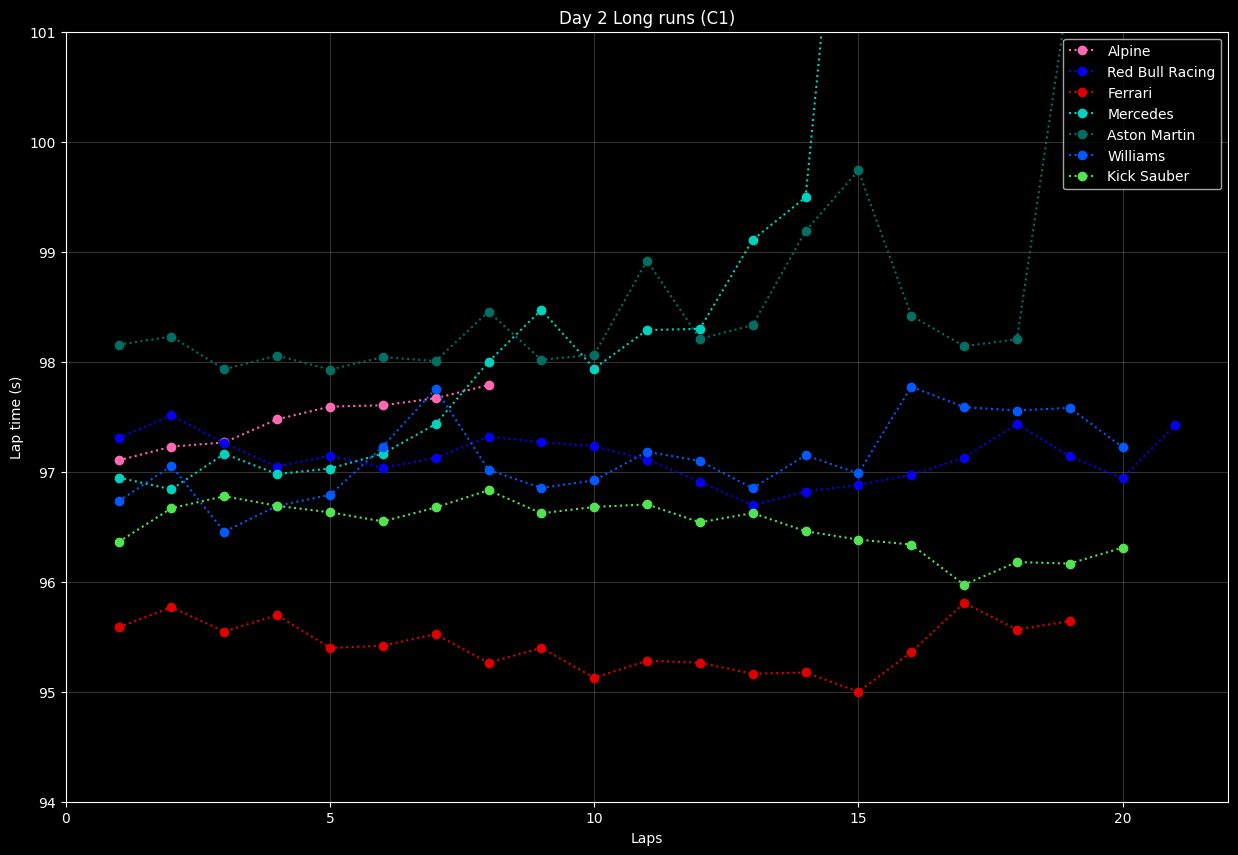

/var/folders/q1/q9_ky6lj68g7kv_5x5_pd9jw0000gp/T/ipykernel_29805/1112962476.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps['Color'] = laps['Compound'].apply(compound_color)
/var/folders/q1/q9_ky6lj68g7kv_5x5_pd9jw0000gp/T/ipykernel_29805/3548917073.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps['LapTime'] = [t.total_seconds() for t in laps['LapTime']]


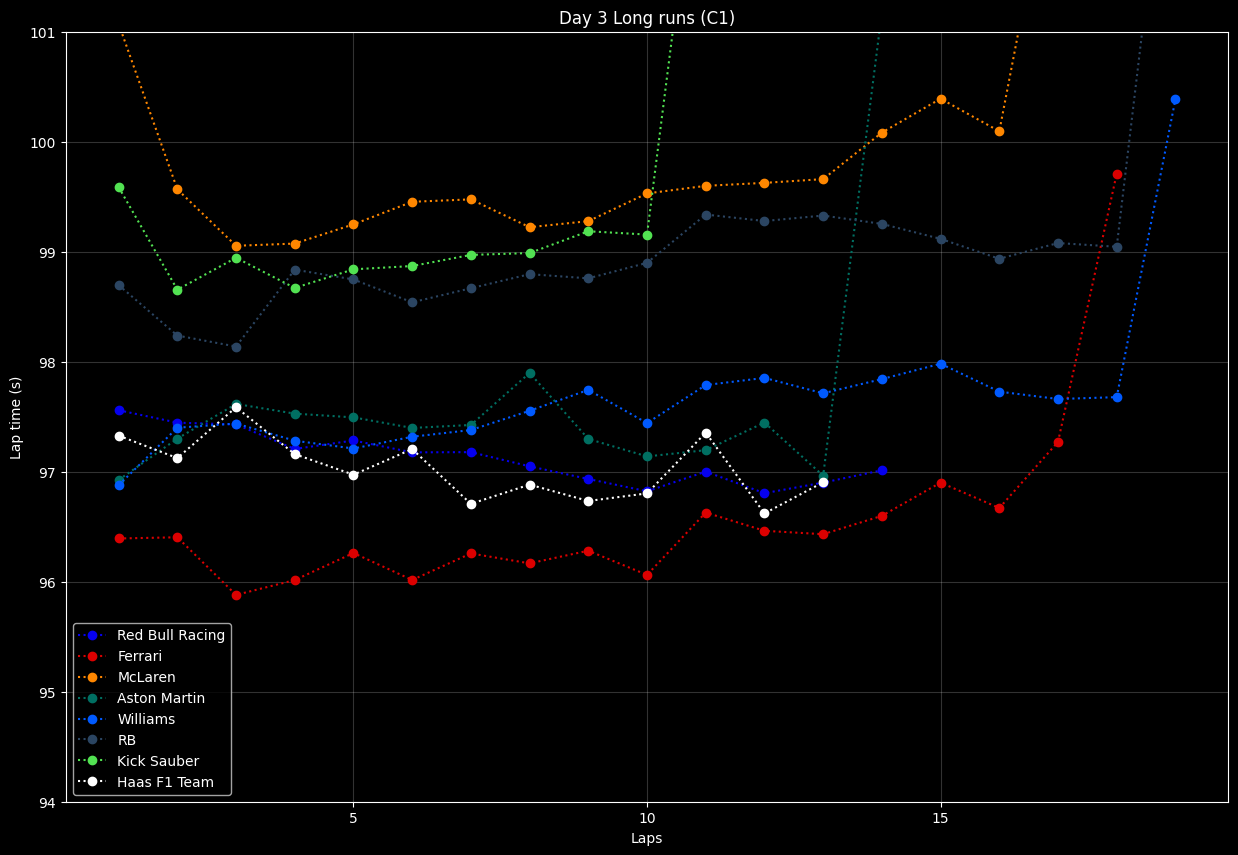

/var/folders/q1/q9_ky6lj68g7kv_5x5_pd9jw0000gp/T/ipykernel_29805/1112962476.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps['Color'] = laps['Compound'].apply(compound_color)
/var/folders/q1/q9_ky6lj68g7kv_5x5_pd9jw0000gp/T/ipykernel_29805/3548917073.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps['LapTime'] = [t.total_seconds() for t in laps['LapTime']]


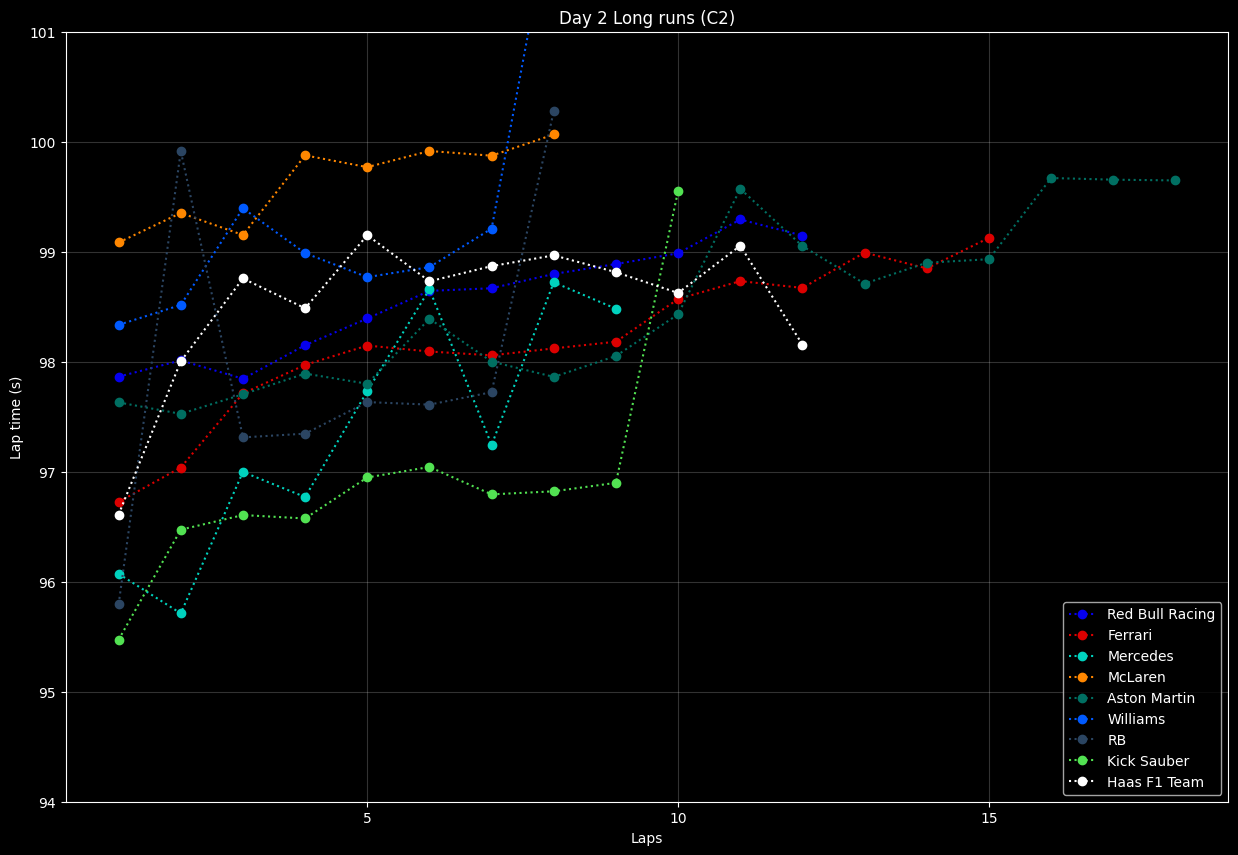

/var/folders/q1/q9_ky6lj68g7kv_5x5_pd9jw0000gp/T/ipykernel_29805/1112962476.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps['Color'] = laps['Compound'].apply(compound_color)
/var/folders/q1/q9_ky6lj68g7kv_5x5_pd9jw0000gp/T/ipykernel_29805/3548917073.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps['LapTime'] = [t.total_seconds() for t in laps['LapTime']]


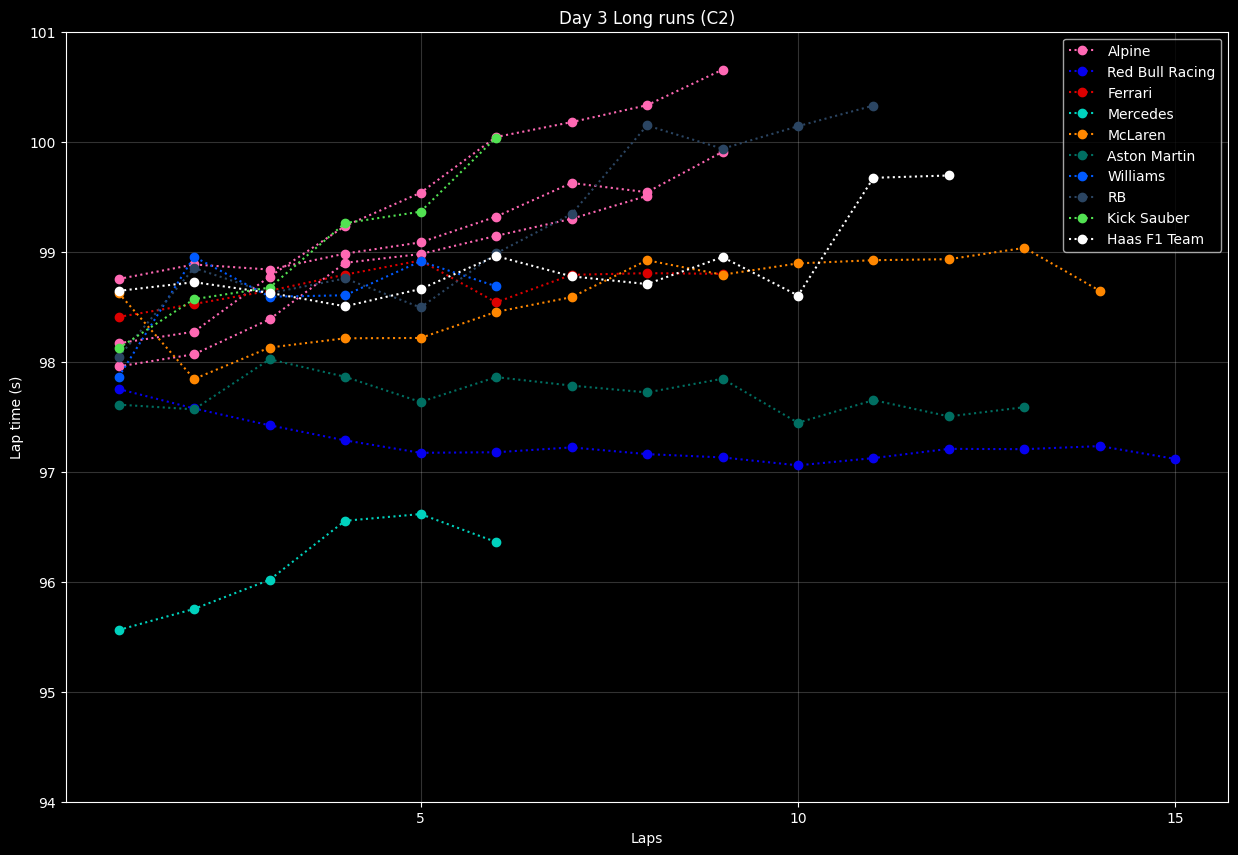

In [355]:
from fastf1 import plotting
plt.style.use('dark_background')
def compare_long_runs_deg(day_laps, title, comparison_teams, main_team = 'Alpine', remove_outlier=False):
    laps = day_laps
    laps['Color'] = laps['Compound'].apply(compound_color)

    laps = laps.pick_team(main_team)

    stints_1 = pick_stints(laps)

    # remove some eye picked outliers. Gasly's stint is not a long stint but multiple quick laps
    if remove_outlier:
        stints_1 = stints_1[1:]

    plt.figure(figsize=(15, 10))
    plt.title(title)
    ax = plt.subplot()
    ax.grid(zorder=10, alpha=0.2)
    ax.set_xlabel('Laps')
    ax.set_ylabel('Lap time (s)')
    ax.set_ylim(bottom=94, top=101)
    ax.set_xticks(range(0, 25, 5))

    alpine_label = 'Alpine'
    marker = day_marker(1)

    # plot day 1
    for stint in stints_1:
        s = stint.reset_index()
        ax.plot(s.index + 1, s['LapTime'], marker, color = 'hotpink', label = alpine_label)
        alpine_label = None

    for (team_name, color_name) in comparison_teams:
        baseline = pick_stints(day_laps.pick_team(team_name))[:1]
        if color_name == 'stake':
            color = '#52e252'
        else:
            color = plotting.TEAM_COLORS[color_name]
        for stint in baseline:
            s = stint.reset_index()
            ax.plot(s.index + 1, s['LapTime'], marker, color=color, label = team_name)

    plt.legend()
    plt.show()

comparison_teams = [
    ('Red Bull Racing', 'red bull'),
    ('Ferrari', 'ferrari'),
    ('Mercedes', 'mercedes'),
    ('McLaren', 'mclaren'),
    ('Aston Martin', 'aston martin'),
    ('Williams', 'williams'),
    ('RB', 'alphatauri'),
    ('Kick Sauber', 'stake'),
    ('Haas F1 Team', 'haas')
]

compare_long_runs_deg(p2.laps[p2.laps['Compound'] == 'HARD'], 'Day 2 Long runs (C1)', comparison_teams, remove_outlier=True)
compare_long_runs_deg(p3.laps[p3.laps['Compound'] == 'HARD'], 'Day 3 Long runs (C1)', comparison_teams, remove_outlier=True)
compare_long_runs_deg(p2.laps[p2.laps['Compound'] == 'MEDIUM'], 'Day 2 Long runs (C2)', comparison_teams, remove_outlier=True)
compare_long_runs_deg(p3.laps[p3.laps['Compound'] == 'MEDIUM'], 'Day 3 Long runs (C2)', comparison_teams, remove_outlier=True)


/var/folders/q1/q9_ky6lj68g7kv_5x5_pd9jw0000gp/T/ipykernel_29805/620950342.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps_1['Day'] = 1
/var/folders/q1/q9_ky6lj68g7kv_5x5_pd9jw0000gp/T/ipykernel_29805/620950342.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  laps_2['Day'] = 2
/var/folders/q1/q9_ky6lj68g7kv_5x5_pd9jw0000gp/T/ipykernel_29805/620950342.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

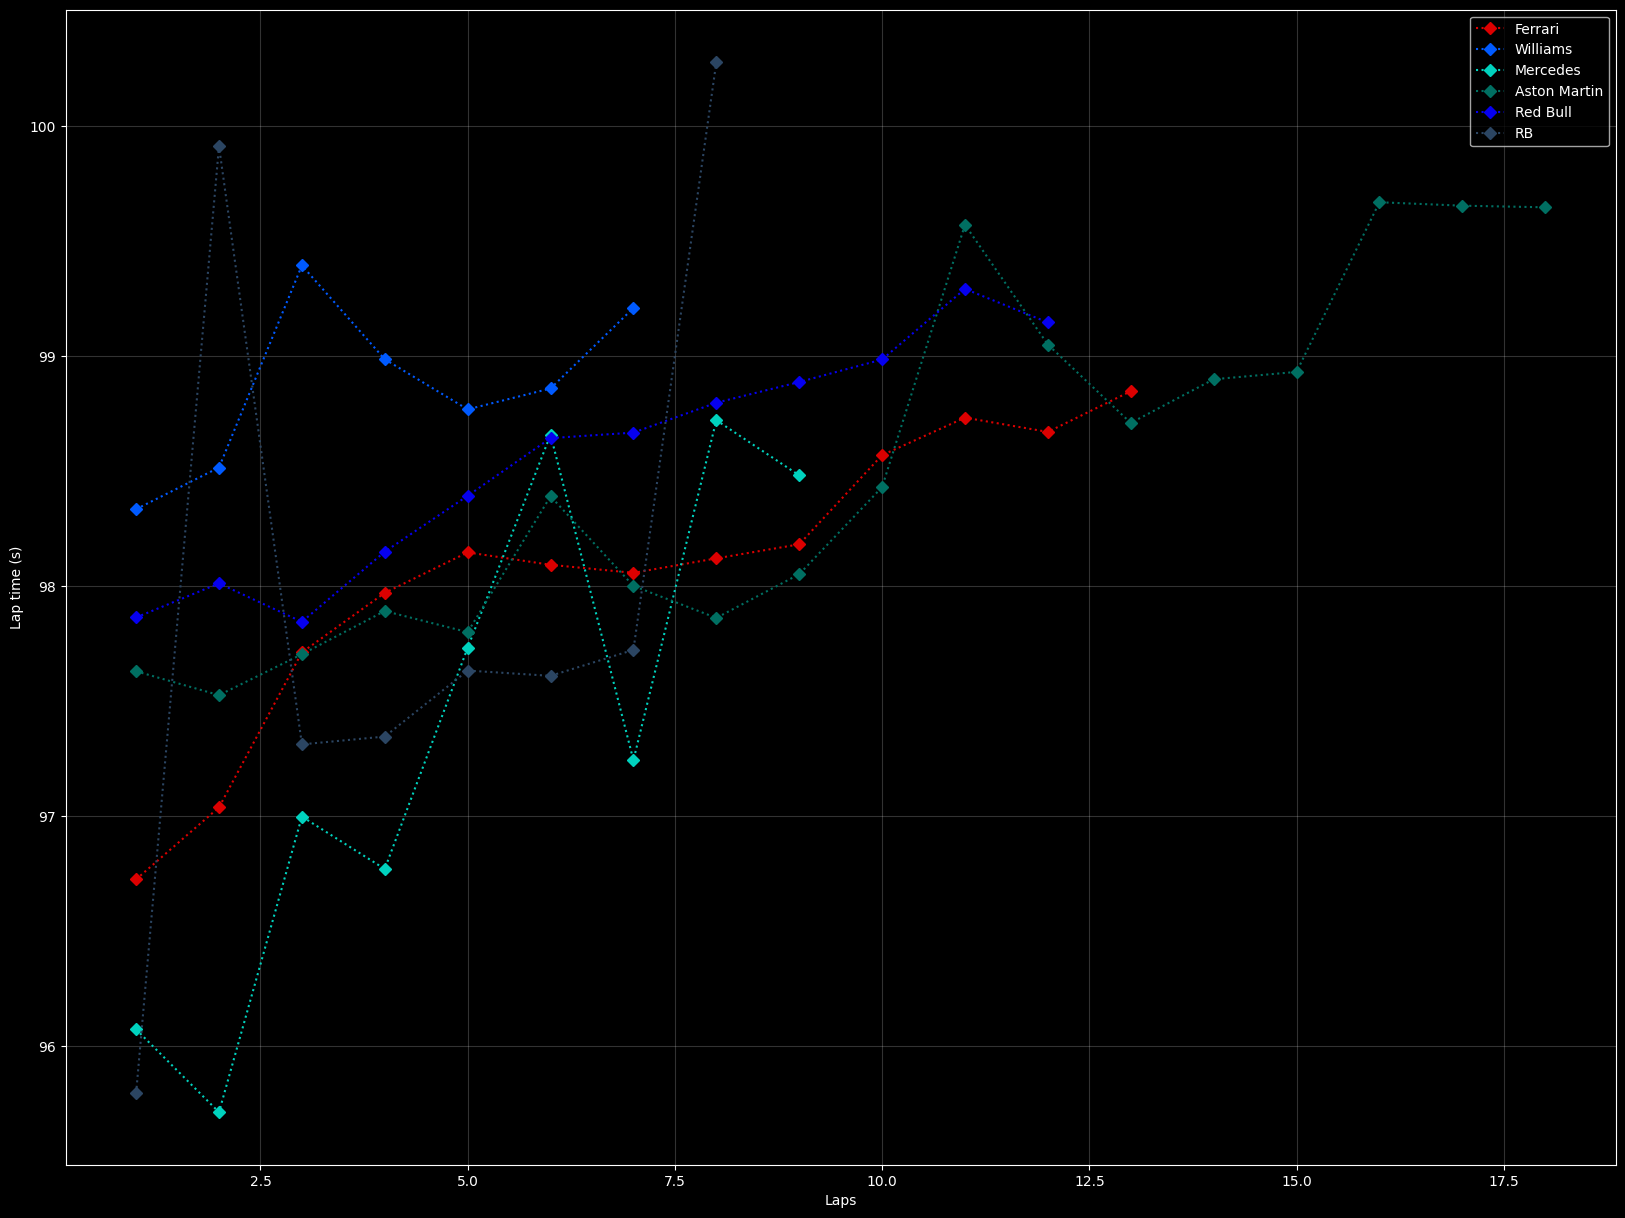

In [325]:
compare_long_runs_deg(p1.laps[p1.laps['Compound'] == 'MEDIUM'], 
                      p2.laps[p2.laps['Compound'] == 'MEDIUM'], 
                      p3.laps[p3.laps['Compound'] == 'MEDIUM'], True)

/var/folders/q1/q9_ky6lj68g7kv_5x5_pd9jw0000gp/T/ipykernel_29805/3762160620.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ocon_laps['LapTime'] = [t.total_seconds() for t in ocon_laps['LapTime']]


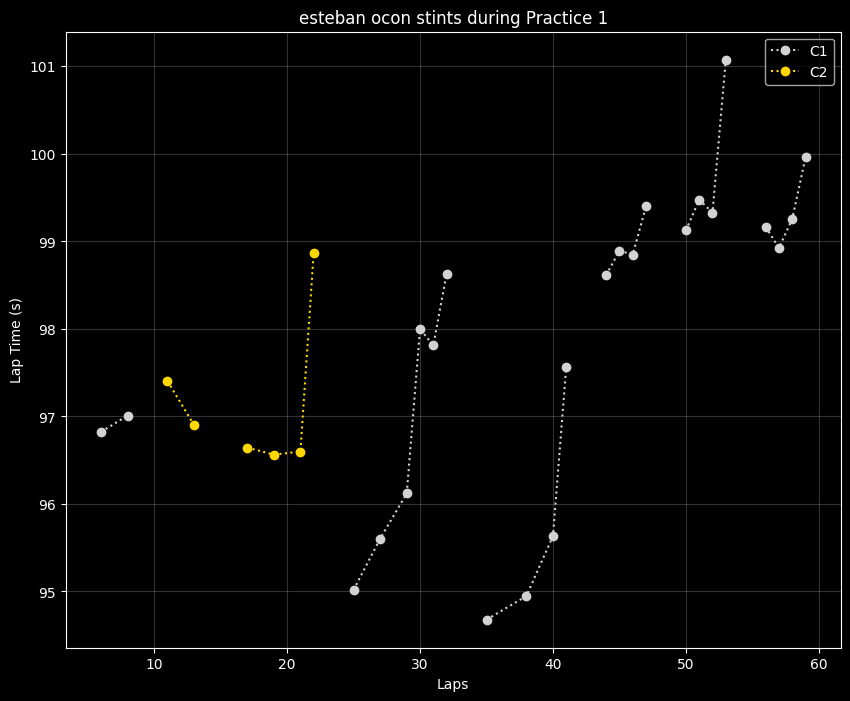

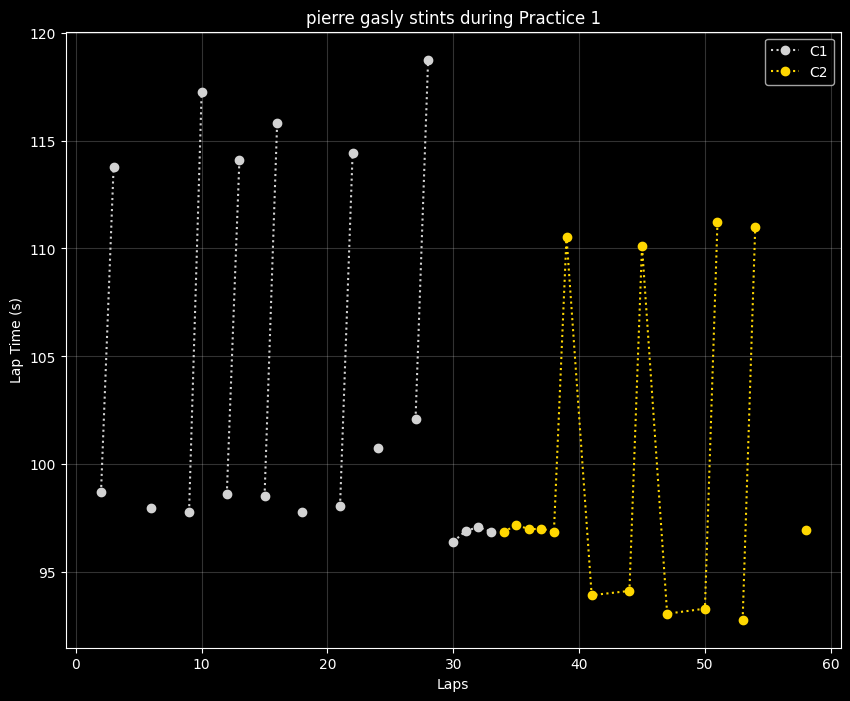

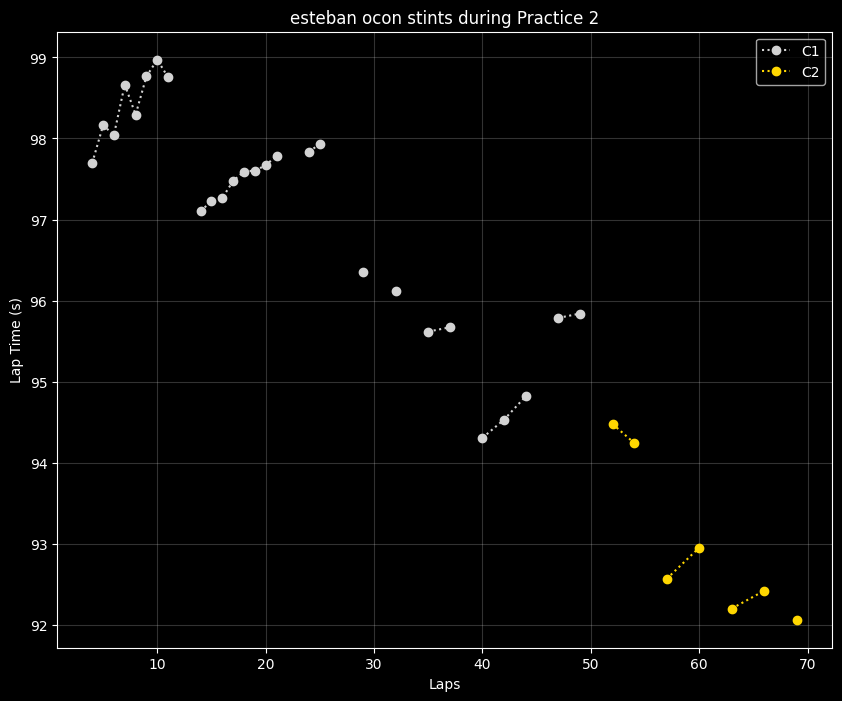

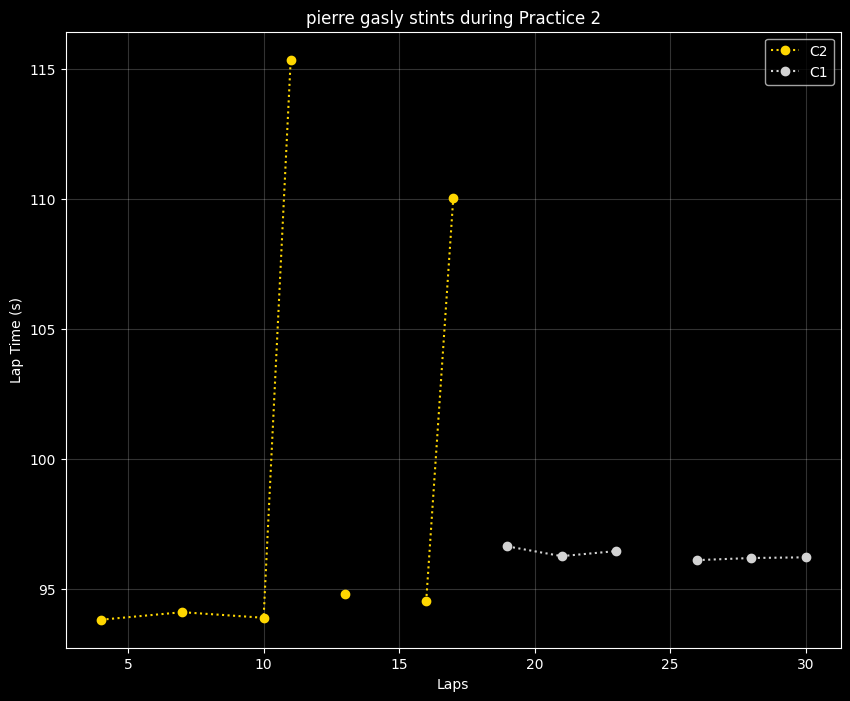

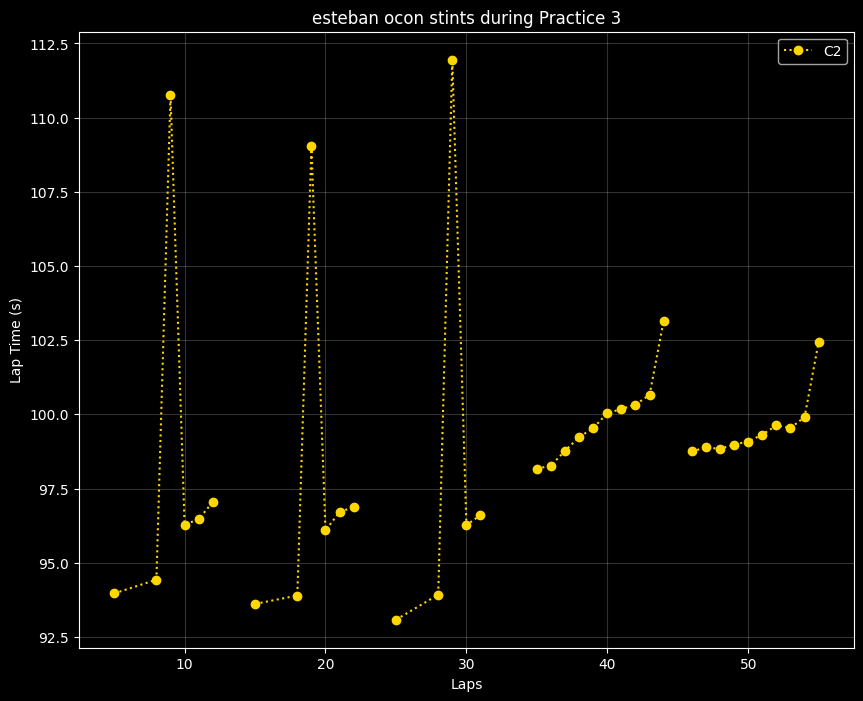

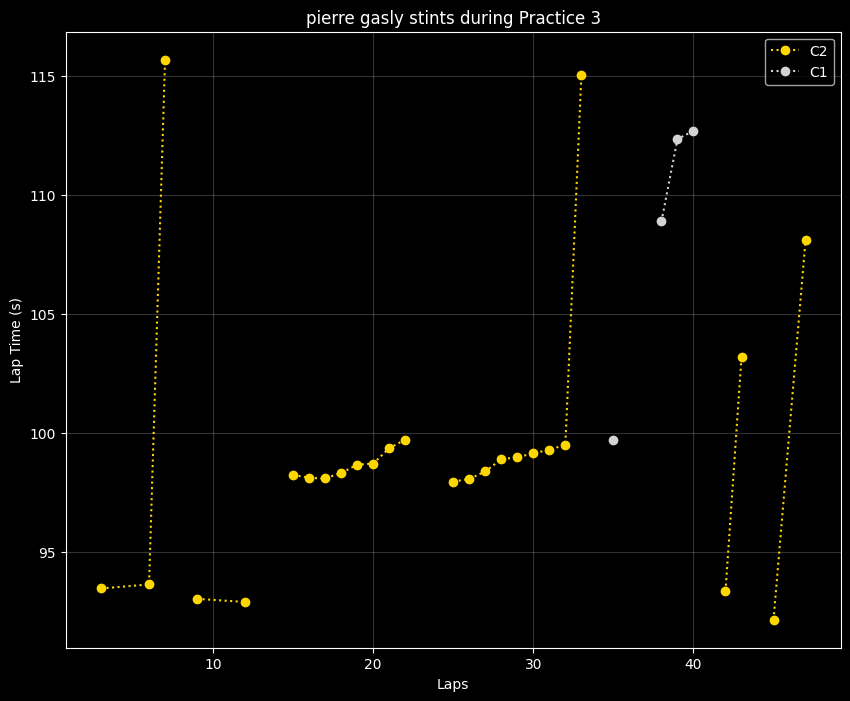

In [384]:
def plot_testing(session, driver, limit=1.30):
    laps = session.laps.pick_quicklaps(limit)

    ocon_laps = laps[laps['Driver'] == driver]
    ocon_laps.set_index('LapNumber', inplace=True)
    ocon_laps['LapTime'] = [t.total_seconds() for t in ocon_laps['LapTime']]
    ocon_laps

    ocon_stints = [x for _, x in ocon_laps.groupby('Stint')]
    plt.figure(figsize=(10,8))
    ax = plt.subplot()

    c1_label = False
    c2_label = False
    c3_label = False
    for stint in ocon_stints:
        label = 'C1' if stint['Compound'].iloc[0] == 'HARD' else 'C2' if stint['Compound'].iloc[0] == 'MEDIUM' else 'C3'
        match label:
            case 'C1':
                if c1_label == False:
                    c1_label = True
                else:
                    label = None
            case 'C2':
                if c2_label == False:
                    c2_label = True
                else:
                    label = None
            case 'C3':
                if c3_label == False:
                    c3_label = True
                else:
                    label = None
        ax.plot(stint['LapTime'], 'o:', color=compound_color(stint['Compound'].iloc[0]), label=label)
    ax.grid(alpha=0.2)
    ax.set_xlabel('Laps')
    ax.set_ylabel('Lap Time (s)')
    plt.title(label = plotting.DRIVER_TRANSLATE[driver] + ' stints during ' + session.name)
    plt.legend()
    plt.show()

plot_testing(p1, 'OCO')
plot_testing(p1, 'GAS')

plot_testing(p2, 'OCO')
plot_testing(p2, 'GAS')

plot_testing(p3, 'OCO')
plot_testing(p3, 'GAS')